In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pydot
from IPython.core.display import Image 

In [3]:
os.chdir('./drive/MyDrive/DSL/정규세션/220208 Decision Tree')

In [4]:
diabetes=pd.read_csv('diabetes.csv')

In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
X=diabetes.iloc[:,:-1].to_numpy()
y=diabetes.iloc[:,-1].to_numpy()

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [8]:
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)

In [9]:
def draw_decision_tree(clf, feature_names = None, class_names = None):
    dot_data = export_graphviz(clf, out_file = None, 
                                feature_names = feature_names,
                                class_names = class_names,
                                filled = True, 
                                rounded = True,
                                special_characters = True)
    graph = pydot.graph_from_dot_data(dot_data)[0]
    image = graph.create_png()
    return Image(image)

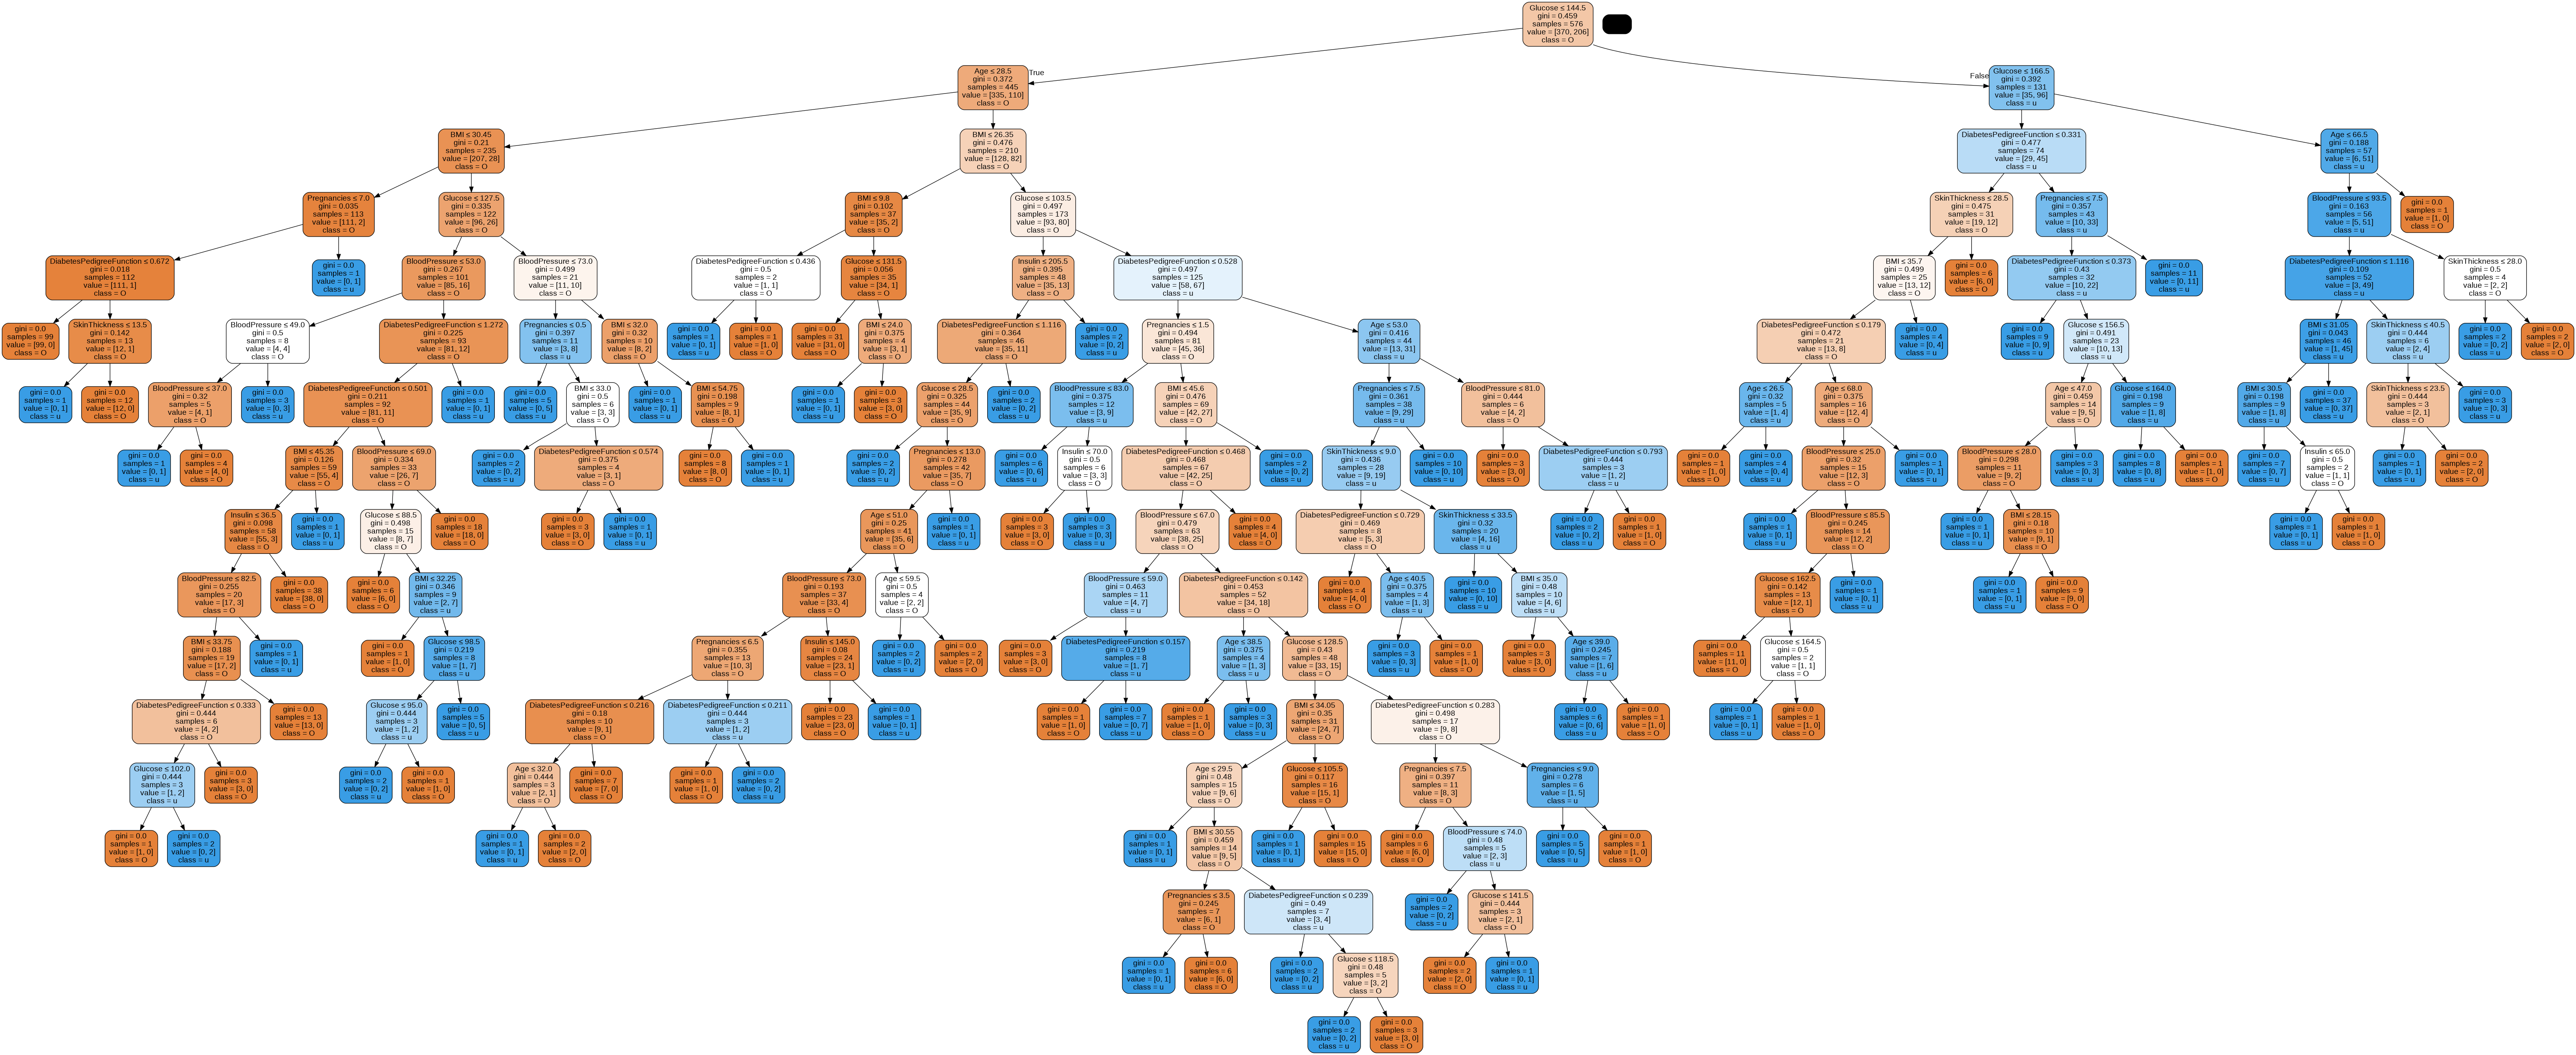

In [10]:
draw_decision_tree(clf,feature_names=diabetes.columns[:-1],class_names=diabetes.columns[-1])

In [11]:
predict=clf.predict(X_test)

In [12]:
accuracy_score(predict,y_test).round(4)

0.724

In [13]:
clf=DecisionTreeClassifier(random_state=0)
path=clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [14]:
clfs=[]

for ccp_alpha in ccp_alphas[:-1]:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf=clf.fit(X_train,y_train)

    clfs.append(clf)

In [15]:
train_accuracy=[]
test_accuracy=[]

for clf in clfs:
    train_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

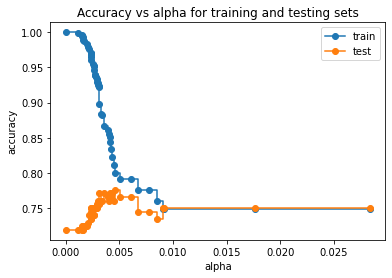

Decision tree with the best pruning : 21 nodes, 0.776 accuracy, 0.00457 ccp_alpha


In [16]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[:-1], train_accuracy, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_accuracy, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()
print("Decision tree with the best pruning : {0} nodes, {1:.3} accuracy, {2} ccp_alpha".format(clfs[test_accuracy.index(max(test_accuracy))].tree_.node_count, max(test_accuracy),ccp_alphas[test_accuracy.index(max(test_accuracy))].round(5)))

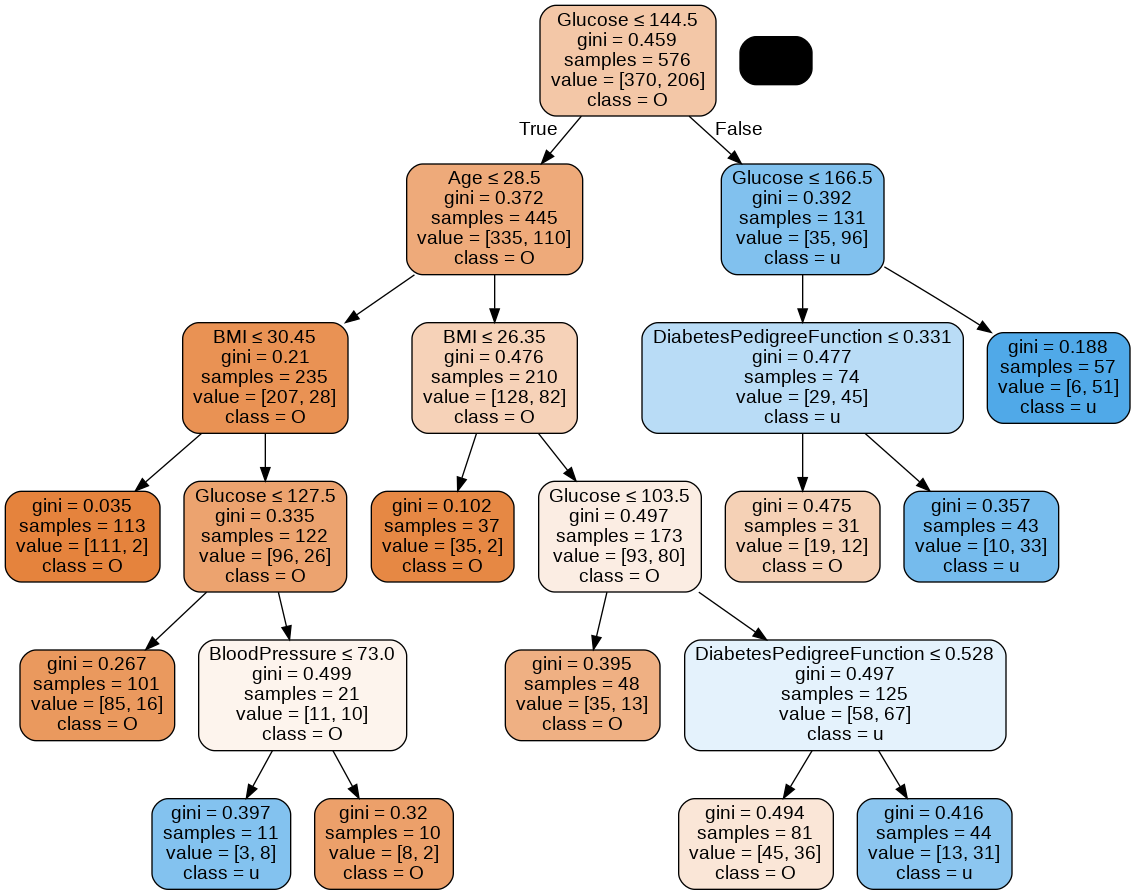

In [17]:
clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.00457)
clf=clf.fit(X_train,y_train)
draw_decision_tree(clf,feature_names=diabetes.columns[:-1],class_names=diabetes.columns[-1])